In [124]:
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [125]:
place_field_data = 'place_field_data.pkl'

In [126]:
with open(place_field_data, 'rb') as f:
    data = pickle.load(f)

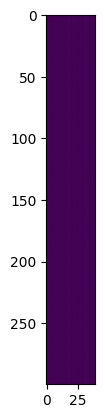

In [127]:
plt.imshow(data['results'].T, vmax=50)

In [128]:
results = data['results']
results = results.T

In [129]:
responding = []
non_responding = []

for i, trace in enumerate(results):
    if np.any(trace > 10):
        responding.append(i)
    else:
        non_responding.append(i)

In [130]:
results_responding = results[responding]
sorting = np.argsort(np.argmax(results_responding.T, axis=0))

In [131]:
stim_durs = [100, 150, 200, 250, 400, 700, 1000]
stim_durs = np.array(stim_durs)
sigma_mean = np.load('sigma_mean.npy')
sigma_std = np.load('sigma_std.npy')

ZeroDivisionError: division by zero

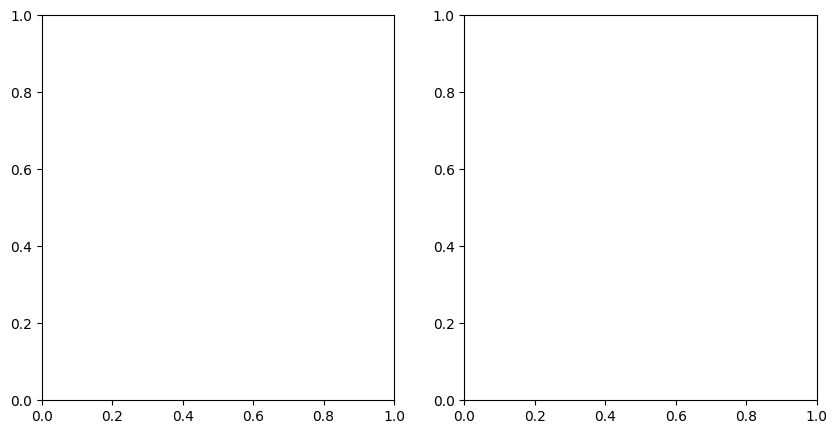

In [132]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].imshow(results_responding[sorting], cmap='jet', vmin=0, vmax=50, aspect=results_responding.shape[1] / results_responding.shape[0])
#ax[1].errorbar(1e2 / stim_durs[::-1], sigma_mean[::-1], sigma_std[::-1], marker='s', markersize=5, color='indianred')

In [133]:
sigma_mean

array([0.06130983, 0.04907721, 0.04450207, 0.04278247, 0.03956881,
       0.03769504, 0.04252415, 0.04349291])

In [134]:
width = 200
fr = []
for id, pat_start in zip(data['pat_idx'], data['pat_start_idx']):
    fr_slice =  data['spks'][:, pat_start : pat_start + width].sum(axis=1) / (1e-3 * 200)

    fr.append(fr_slice)

fr = np.array(fr).T

TypeError: Invalid shape (0,) for image data

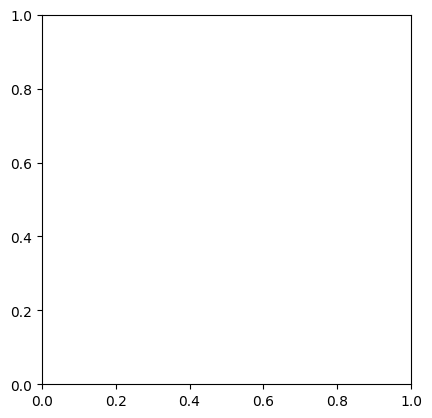

In [135]:
fr_responsding = fr[responding]

plt.imshow(fr_responsding[sorting], vmax=40, cmap='jet')

In [136]:
fr.max()


ValueError: zero-size array to reduction operation maximum which has no identity

ZeroDivisionError: division by zero

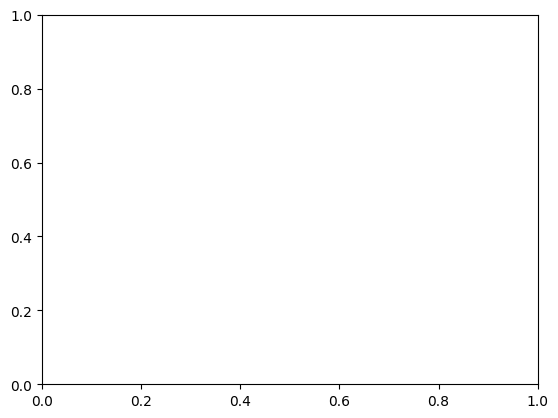

In [139]:
fig, ax = plt.subplots(1,1)

ax.imshow(results_responding[sorting], cmap='jet', vmin=0, vmax=50, aspect=results_responding.shape[1] / results_responding.shape[0])

plt.savefig('placefields.png')

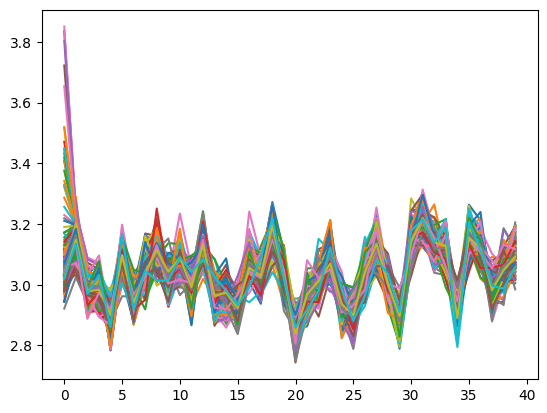

In [138]:
for fr in data['results'].T:
    plt.plot(fr)